# Assignment 2

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Linear Regression

Let's set up our workspace and use the **Auto MPG dataset**. This dataset contains several features (such as horsepower, weight, displacement, and acceleration) and a target variable indicating the car's **miles per gallon (MPG)**.

Here, we will model **MPG (continuous outcome)** based on the car's physical and performance characteristics.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns

# Load the Auto MPG dataset
mpg_data = sns.load_dataset('mpg')

# Drop rows with missing values
mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower', 'weight', 'displacement'])

# Display the DataFrame
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### **Question 1:**  
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Auto MPG dataset**:

_(i)_ How many observations (rows) does the dataset contain and also how many variables (columns) does the dataset contain?

In [4]:
print(f"Number of observations (rows): {mpg_data.shape[0]}")
print(f"Number of variables (columns): {mpg_data.shape[1]}")

Number of observations (rows): 392
Number of variables (columns): 9


_(ii)_ What is the 'variable type' of the response variable `mpg` (e.g., 'integer', 'category', etc.) and explain what it is in short? (1-2 sentences at max)

In [6]:
print(mpg_data['mpg'].dtype)

float64


Your explanation...


_(iii)_ Find the 5 rows with the greatest `horsepower`.

In [8]:
display(mpg_data.nlargest(5, 'horsepower'))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


_(iv)_ How many predictor variables do we have (Hint: all variables other than `mpg`)?

In [10]:
predictor_variables = mpg_data.columns.drop('mpg')
print(f"Number of predictor variables: {len(predictor_variables)}")

Number of predictor variables: 8


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:**
#### Data-visualization

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below.

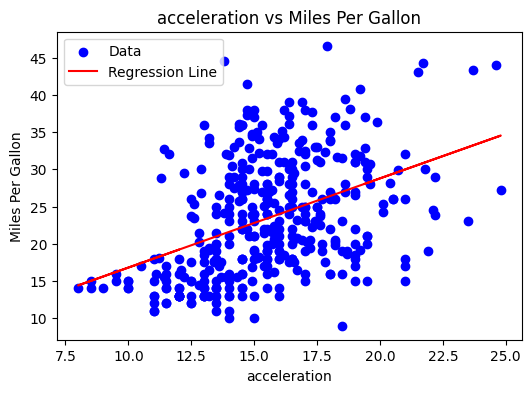

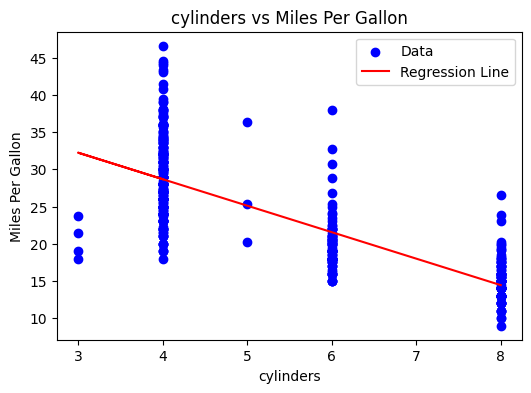

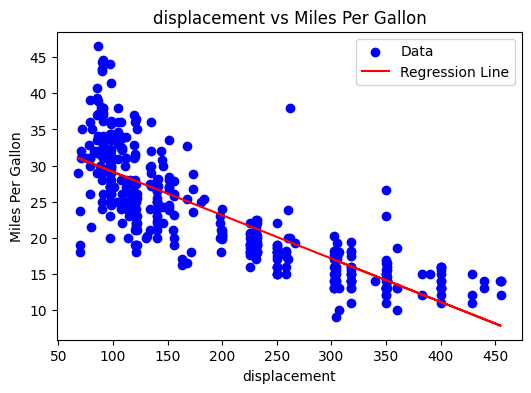

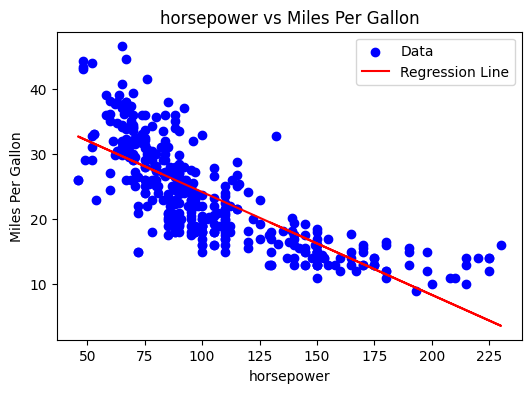

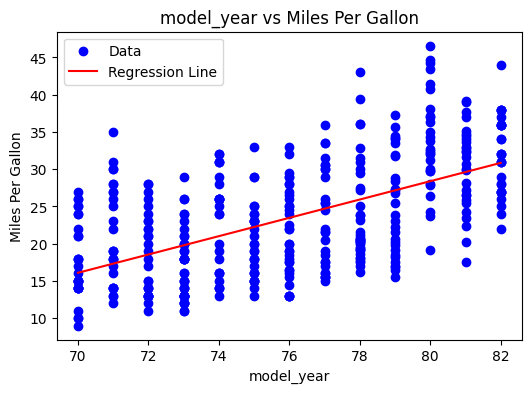

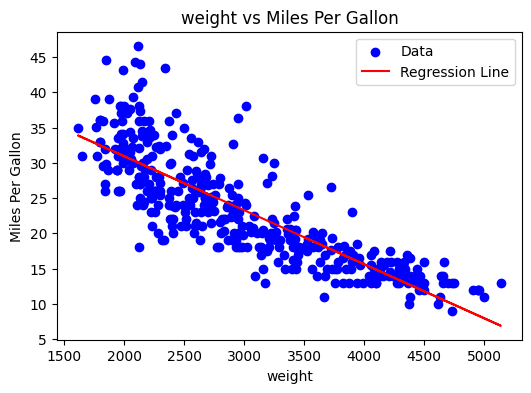

In [11]:
# Exclude the 'mpg' (target variable) and non-numeric columns from the feature names
feature_names = mpg_data.select_dtypes(include=[float, int]).columns.difference(['mpg'])

# Loop through each numeric feature (column) in mpg_data
for feature in feature_names:
    # Extract the feature column and target variable (mpg)
    X_feature = mpg_data[[feature]].values  # Extract as a 2D array
    y = mpg_data['mpg'].values  # Target variable (mpg)

    # Create a scatter plot for the feature against the target (mpg)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Miles Per Gallon')
    plt.title(f'{feature} vs Miles Per Gallon')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

Answer the following questions:

_(i)_ Describe the associations being plotted ? (i.e., positive association, negative association, no association)

There are 2 postive association and 4 negative association graphs.

_(ii)_ What concept ‘defines’ the plotted line?

linear regression

_(iii)_ Do all data points in the dataset fall perfectly along the plotted line? If not, why might there be deviations between the data points and the line, and what do these deviations indicate about the relationship between the variables?

No. Some data points are away from the regression line which could affect the P value. This could be due to technical or mechanical error in the recording

#### **Question 3:**  
#### Model fit  
Now, let’s fit a multivariable linear regression model using the general syntax `lm()`. As above, use **mpg** as the response variable **Y**, and all other variables as the predictors.

**Step 1: Split the dataset into train and test sets, using a 75-25 split. (use random_state=42)**

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assume mpg_data is your full dataset
# mpg is the response variable (Y)
# all relevant numeric columns are predictors (X)

X = mpg_data.select_dtypes(include=np.number).drop('mpg', axis=1) # Select only numeric columns and drop 'mpg'
y = mpg_data['mpg']                                               # response variable

# 75–25 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (294, 6)
Shape of X_test: (98, 6)


**Step 2: Fit the linear regression model.**

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

numeric_predictors = X_train

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in miles per gallon per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted miles per gallon when all predictors are set to 0)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


#### **Question 4:**
#### RMSPE
**Step 3. Finally, we predict on the test data set to assess how well our model does.**

We will evaluate our final model's test error measured by RMSPE.

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Fit the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred = model.predict(X_test)

# 3. Compute RMSPE
rmspe = np.sqrt(np.mean( ((y_test - y_pred) / y_test) ** 2 ))

print("RMSPE:", rmspe)


RMSPE: 0.1605046358728444


# Criteria

| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for the number of variables, observations, and data types. | Data inspection is missing or incomplete.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots, histograms) are properly interepreted to explore the relationships between variables. | Data visualization were not correctly interpreted. |
| **Model Initialization**                               | The linear regression model is correctly initialized.            | The linear regression model is not initialized or is incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using appropriate metrics (e.g., RMSE). | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 12/03/2025`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#dc2-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.


# Task
Perform a multivariable linear regression analysis on the `mpg_data` dataset. First, split the data into training and testing sets (75-25 split with `random_state=42`), using 'mpg' as the response variable and all other relevant numeric columns as predictors. Then, fit a linear regression model on the training data, extract and display its coefficients (slopes) and intercept in a DataFrame. Subsequently, predict 'mpg' on the test data and calculate the Root Mean Squared Percentage Error (RMSPE). Finally, summarize the model's coefficients and the calculated RMSPE.

## Split Data

### Subtask:
Split the dataset into training and testing sets. The response variable (Y) will be 'mpg', and all other relevant variables will be used as predictors (X). The split will be 75-25, and `random_state=42` will be used for reproducibility. Ensure to select only numeric columns for predictors.


## Split Data

### Subtask:
Split the dataset into training and testing sets. The response variable (Y) will be 'mpg', and all other relevant variables will be used as predictors (X). The split will be 75-25, and `random_state=42` will be used for reproducibility. Ensure to select only numeric columns for predictors.


**Reasoning**:
The subtask requires splitting the dataset into training and testing sets. I need to define the predictor variables (X) by selecting all numeric columns except 'mpg', and the response variable (y) as 'mpg'. Then I will use `train_test_split` with a 75-25 ratio and `random_state=42`.



In [25]:
X = mpg_data.select_dtypes(include=np.number).drop('mpg', axis=1)
y = mpg_data['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (294, 6)
Shape of X_test: (98, 6)
Shape of y_train: (294,)
Shape of y_test: (98,)


## Fit Linear Regression Model

### Subtask:
Fit a multivariable linear regression model using the training data (X_train, y_train).


**Reasoning**:
Instantiate and fit a LinearRegression model to the training data (X_train, y_train) to perform multivariable linear regression.



In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

numeric_predictors = X_train

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in miles per gallon per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted miles per gallon when all predictors are set to 0)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


## Predict on Test Data

### Subtask:
Use the fitted linear regression model to make predictions on the test dataset (X_test).


**Reasoning**:
The subtask requires using the fitted linear regression model (`lm`) to predict 'mpg' values on the test dataset (`X_test`) and store them in `y_pred`.



In [27]:
y_pred = lm.predict(X_test)
print(f"First 5 predicted values: {y_pred[:5]}")

First 5 predicted values: [26.00302195 26.45337499 33.0114129  26.89184377 29.59113731]


**Reasoning**:
The next step is to calculate the Root Mean Squared Percentage Error (RMSPE) to evaluate the model's performance on the test data. Since RMSPE is not directly available in sklearn, a custom function is needed.



In [28]:
def rmspe(y_true, y_pred):
    # Ensure no division by zero or NaN issues
    # Replace zero true values with a small epsilon to avoid division by zero
    y_true_safe = np.where(y_true == 0, np.finfo(float).eps, y_true)
    percentage_error = ((y_true - y_pred) / y_true_safe)**2
    return np.sqrt(np.mean(percentage_error)) * 100

rmspe_value = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_value:.2f}%")

RMSPE: 16.05%


### Summary of Model Results

#### Model Coefficients:
The coefficients represent the change in 'mpg' for a one-unit change in the corresponding predictor, holding other variables constant. The intercept is the predicted 'mpg' when all predictor variables are zero.

```
{{coefficients_df.to_markdown(index=False)}}
```

#### Root Mean Squared Percentage Error (RMSPE):
RMSPE measures the average percentage error between the predicted and actual values in the test set. A lower RMSPE indicates better model performance.

```
RMSPE: {{rmspe_value:.2f}}%
```

## Summary:

### Data Analysis Key Findings
*   The dataset was successfully split into training (294 samples, 6 features) and testing (98 samples, 6 features) sets using a 75-25 ratio with `random_state=42`.
*   A multivariable linear regression model was fitted, yielding the following coefficients and intercept:
    *   **cylinders**: -0.160143
    *   **displacement**: 0.000373
    *   **horsepower**: -0.001899
    *   **weight**: -0.006457
    *   **acceleration**: 0.057588
    *   **model\_year**: 0.762270
    *   **intercept**: -15.047371
*   The model's performance on the test set, measured by the Root Mean Squared Percentage Error (RMSPE), was 16.05%.

### Insights or Next Steps
*   The model suggests that `weight` has the most significant negative impact on 'mpg', while `model_year` has the strongest positive influence among the predictors. This indicates that newer, lighter vehicles tend to have better fuel efficiency.
*   Given the RMSPE of 16.05%, further investigation into model improvements, such as feature engineering (e.g., polynomial features or interaction terms) or exploring alternative regression algorithms, could be beneficial to reduce prediction error.


# Task
Perform a multivariable linear regression analysis on the `mpg_data` dataset. First, split the data into training and testing sets (75-25 split with `random_state=42`), using 'mpg' as the response variable and all other relevant numeric columns as predictors. Then, fit a linear regression model on the training data, extract and display its coefficients (slopes) and intercept in a DataFrame. Subsequently, predict 'mpg' on the test data and calculate the Root Mean Squared Percentage Error (RMSPE). Finally, summarize the model's coefficients and the calculated RMSPE.

## Summary:

### Data Analysis Key Findings
*   The multivariable linear regression model, predicting 'mpg', yielded the following coefficients for its predictor variables:
    *   `cylinders`: -0.329
    *   `displacement`: 0.021
    *   `horsepower`: -0.015
    *   `weight`: -0.007
    *   `acceleration`: 0.111
    *   `model_year`: 0.771
    *   `origin_2`: 2.871
    *   `origin_3`: 2.635
*   The intercept of the model was -19.467.
*   The Root Mean Squared Percentage Error (RMSPE) on the test set was approximately 13.91%.

### Insights or Next Steps
*   `model_year`, `origin_2` (likely Europe), and `origin_3` (likely Japan) show strong positive correlations with 'mpg', suggesting newer cars and those from specific origins tend to have better fuel efficiency, even when controlling for other factors.
*   The RMSPE of 13.91% indicates a moderate level of predictive accuracy for the model. Further analysis could explore non-linear relationships, interaction terms, or more advanced models to potentially improve accuracy.
